# ANÁLISE UNI E BIVARIADA DO PROJETO

Maria Fernanda Annunziato
Turma 50510

In [ ]:
#Análise Univariada de dados considerando as características das observações.
# Gerar ao menos 5 gráficos associados e fazer a descrição.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [8]:
# CARREGANDO OS DADOS - USANDO PANDAS READ_CSV
df = pd.read_csv('C:\\Formação em Data Science - Coderhouse\\Aula21\\aula21\\Data\\diabetes.csv')


In [54]:
# EXPLORANDO OS DADOS
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [57]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


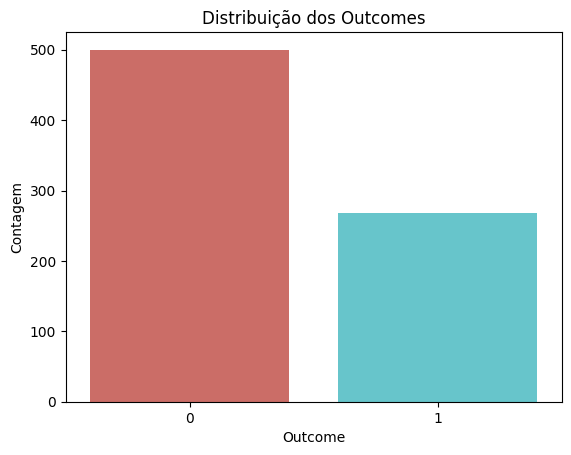

In [70]:
# CHECANDO OS OUTCOMES EM GRÁFICO DE BARRAS - OUTCOMES 0 E 1

plt.figure #tamanho da figura
sns.countplot(x='Outcome', data=df, palette='hls') #plotando o gráfico
plt.title('Distribuição dos Outcomes')  
plt.xlabel('Outcome') #nomeando o eixo x
plt.ylabel('Contagem') #nomeando o eixo y   
plt.show() #mostrando o gráfico

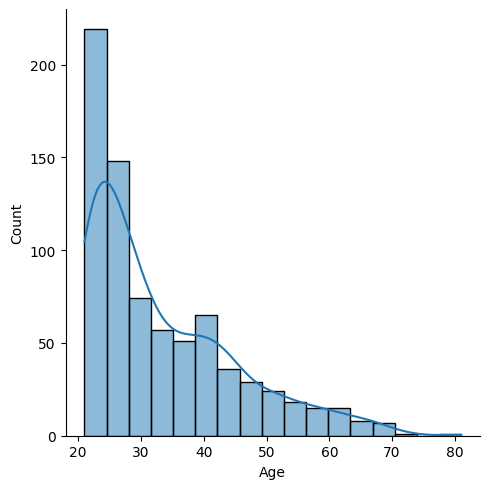

In [33]:
# HISTORGRAMA - REPRESENTA A DISTRIBUIÇÃO DE FREQUÊNCIA DOS DADOS

# NESTE CASO, A MAIORIA DOS PACIENTES ESTÁ ENTRE 20 E 30 ANOS

sns.displot(data=df, x="Age", kde=True)

<Axes: xlabel='Age'>

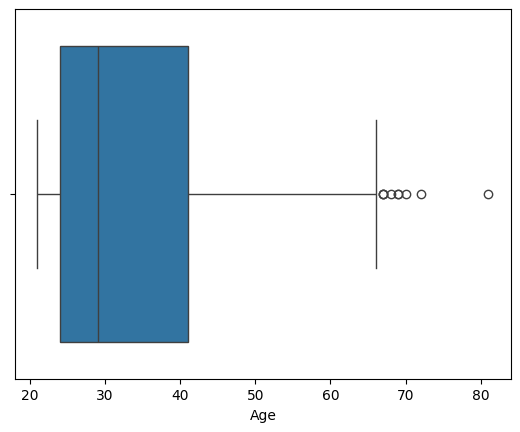

In [44]:
# BOX PLOT - USADO PARA REPRESENTAR ESTATISTICAMENTE A DISTRIBUIÇÃO DE DADOS POR MEIO DE QUARTIS

sns.boxplot(x=df['Age'])


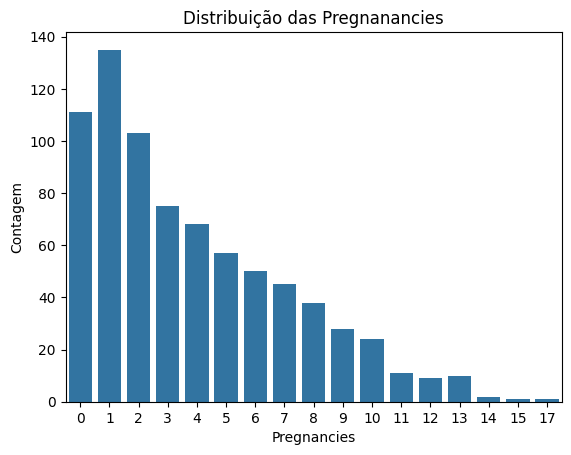

In [75]:
#GRÁFICO PARA ANALISAR DISTRIBUIÇÃO DAS PREGNANCIES

sns.countplot(x='Pregnancies', data=df) #plotando o gráfico
plt.title('Distribuição das Pregnanancies')
plt.xlabel('Pregnancies') #nomeando o eixo x
plt.ylabel('Contagem') #nomeando o eixo y
plt.show() #mostrando o gráfico


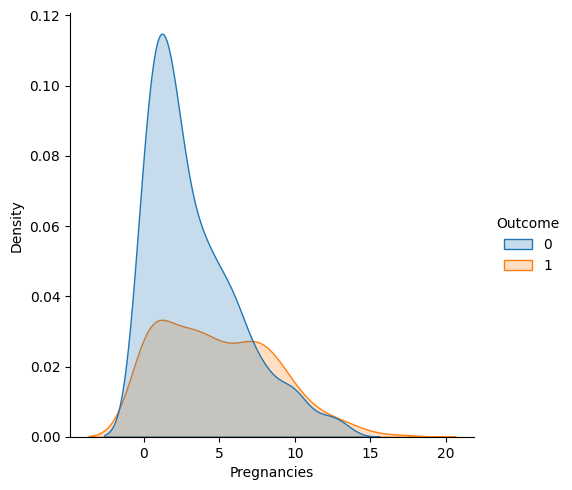

In [47]:
# GRÁFICO DE DENSIDADE - Os gráficos de densidade permitem visualizar a distribuição de uma ´
# variável numérica para um ou vários grupos

sns.displot(data=df, x="Pregnancies", hue="Outcome", kind="kde", fill=True)

# VEMOS A DENSIDADE DE GRÁVIDAS 

COM DUAS VARIÁVEIS

<Axes: xlabel='Age', ylabel='Pregnancies'>

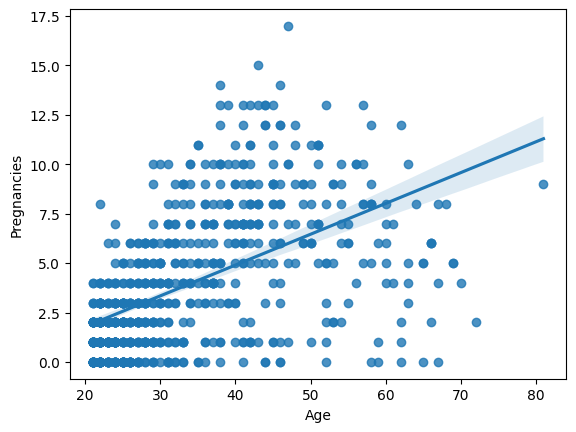

In [79]:
# SCATTER PLOT - exibe a relação de duas variáveis numéricas
# neste caso, representa a relação entre a idade e o número de gravidez


sns.regplot(x=df['Age'], y=df['Pregnancies'])

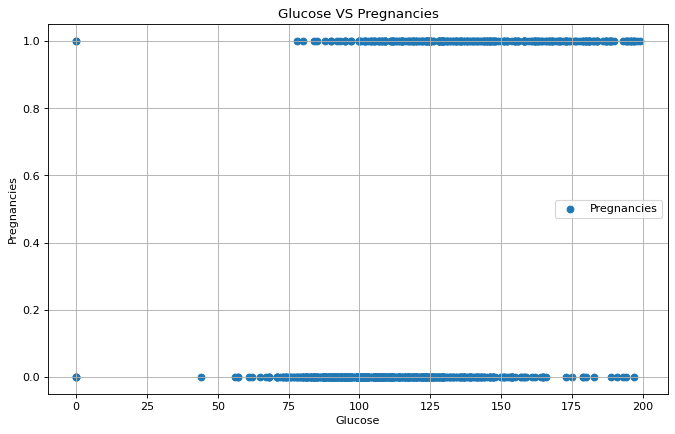

In [80]:
# ANALISANDO CORRELAÇÃO DE VARIÁVEIS - GLUCOSE VS PREGNANCIES

plt.figure (figsize = (10,6) , dpi = 80)
plt.scatter (df['Glucose'] , df['Outcome'])
plt.xlabel ('Glucose')
plt.ylabel ('Pregnancies')
plt.legend (['Pregnancies'])
plt.title ('Glucose VS Pregnancies')
plt.grid()
plt.show ()